In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import matplotlib.style as style
import plotly.express as px
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn import linear_model, decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv('heart.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.groupby('target').size()

target
0    138
1    165
dtype: int64

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

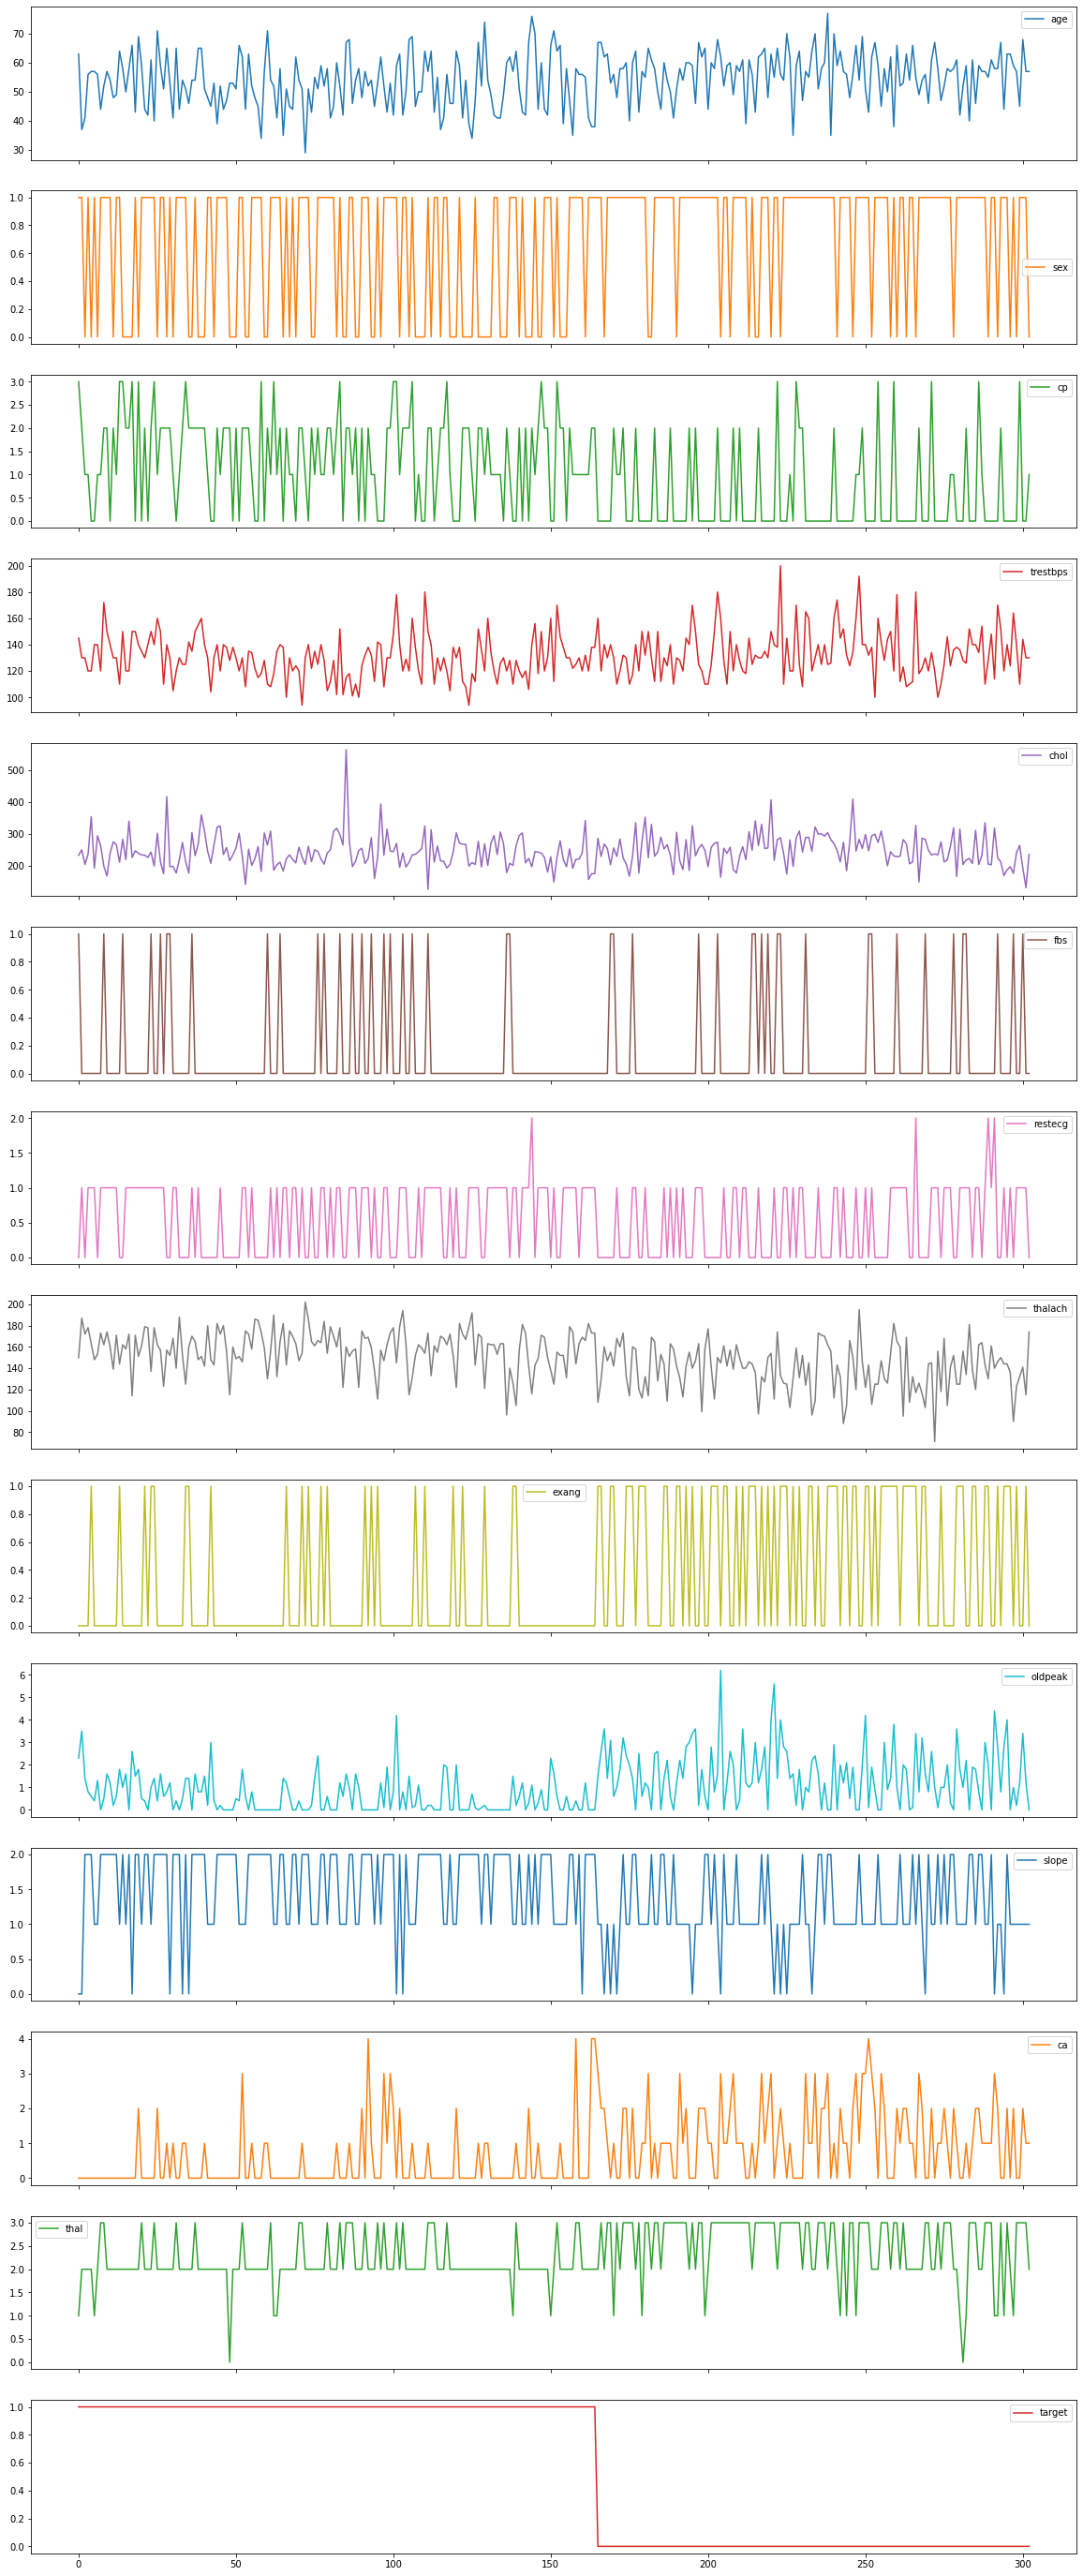

In [9]:
df.plot(subplots=True, sharex=True ,figsize=(20,50))

#### As we can see our data is quite balanced so we move on to visualization..

# Data Visualization


In [10]:
df.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

<ipython-input-11-b95926c708e3>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


<AxesSubplot:>

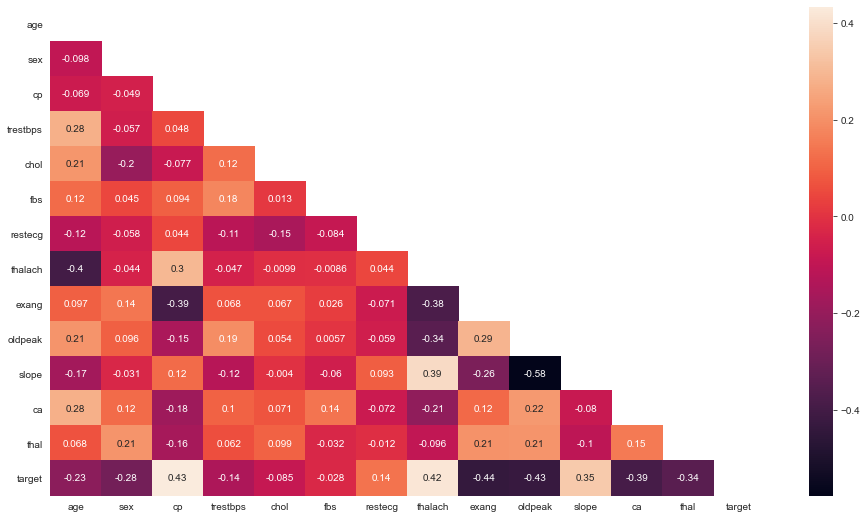

In [11]:
style.use("ggplot")
sns.set_style('whitegrid')
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (16,9))

sns.heatmap(df.corr(),annot=True,mask=mask)

<AxesSubplot:title={'center':'Correlation with target'}>

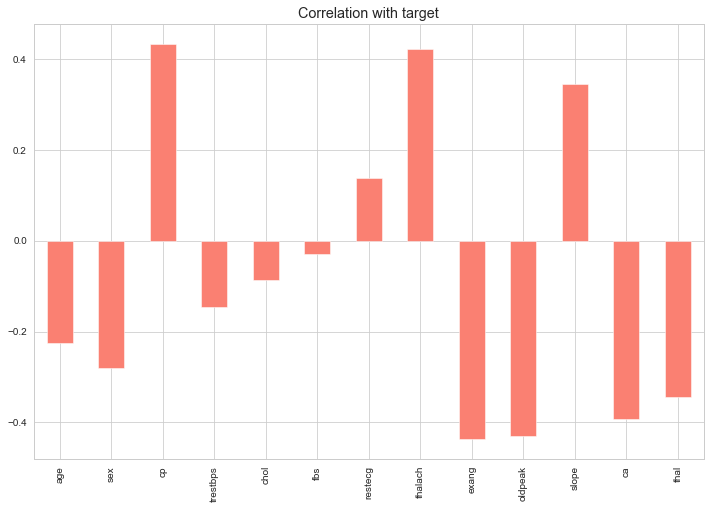

In [12]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), color=['salmon'],
                                                   title="Correlation with target")

## Correlation 
#### As we can see chol and fbs are very least correlated with target.

<AxesSubplot:>

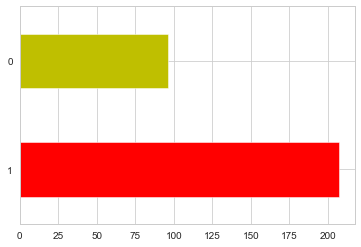

In [13]:
df['sex'].value_counts().plot(kind='barh',color=['r','y'])

<Figure size 1152x648 with 0 Axes>

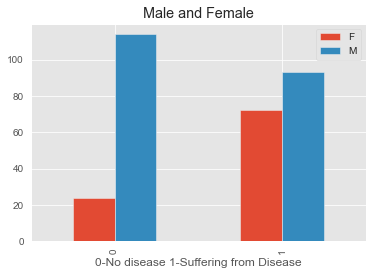

In [14]:
style.use("ggplot")
plt.figure(figsize=(16,9))


pd.crosstab(df.target, df.sex).plot(kind='bar')
plt.xlabel("0-No disease 1-Suffering from Disease")
plt.title("Male and Female")

plt.legend(["F","M"])

<Figure size 1152x648 with 0 Axes>

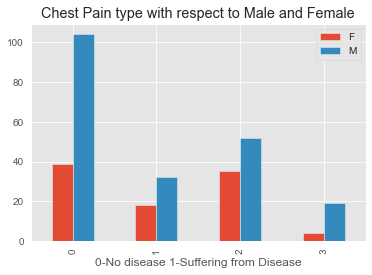

In [15]:
style.use("ggplot")
plt.figure(figsize=(16,9))


pd.crosstab(df.cp, df.sex).plot(kind='bar')
plt.xlabel("0-No disease 1-Suffering from Disease")
plt.title("Chest Pain type with respect to Male and Female")

plt.legend(["F","M"])

In [16]:
dis_var=[]
con_var=[]
for i in df.columns:
    if len(df[i].unique())>10:
        con_var.append(i)
    else:
        dis_var.append(i)
dis_var

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

## Obserbvation
We can observe that female population has less suffering than male.

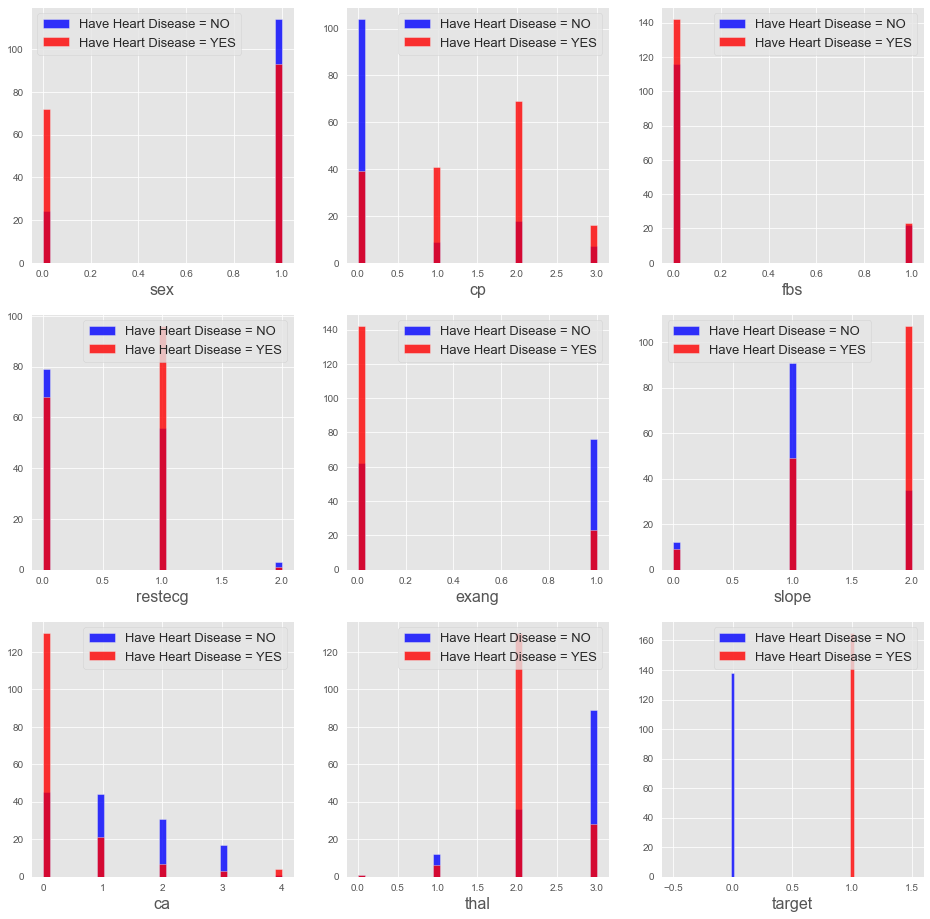

In [17]:
plt.figure(figsize=(16,16))
for i,j in enumerate(dis_var):
    plt.subplot(3,3,i+1)
    df[df["target"] == 0][j].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.8)
    df[df["target"] == 1][j].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.8)
    plt.xlabel(j,fontsize=16)
    plt.legend(fontsize=13)

## Observation
#### cp(chest-pain)
(Value 0: typical angina
Value 1: atypical angina
Value 2: non-anginal pain
Value 3: asymptomatic)
We can see paitient with value 1 2 3 are more likely to have heart disease than value 0(typical angina)

#### restecg: (resting electrocardiographic results)
People with value 1 is more likely to have heart disease

#### exang(whether the patient had angina during exercise)

Val 0: no
Val 1: yes
people with a value of 0 (No ==> angina induced by exercise) have more heart disease than people with a value of 1

#### slope(slope of the ST segment during the most demanding part of the exercise)
People with a slope value of 2 (Downslopins: signs of an unhealthy heart) are more likely to have heart disease than people
with a slope value of 0(Upsloping: best heart rate with exercise) 
or 1 (Flatsloping: minimal change (typical healthy heart)).

#### thal(Results of the blood flow observed via the radioactive dye.
People with a thal value of 2 (defect corrected: once was a defect but ok now) are more likely to have heart disease.

#### ca(Number of main blood vessels coloured by the radioactive dye)
people with value 0 are more likely to suffer from heart disease

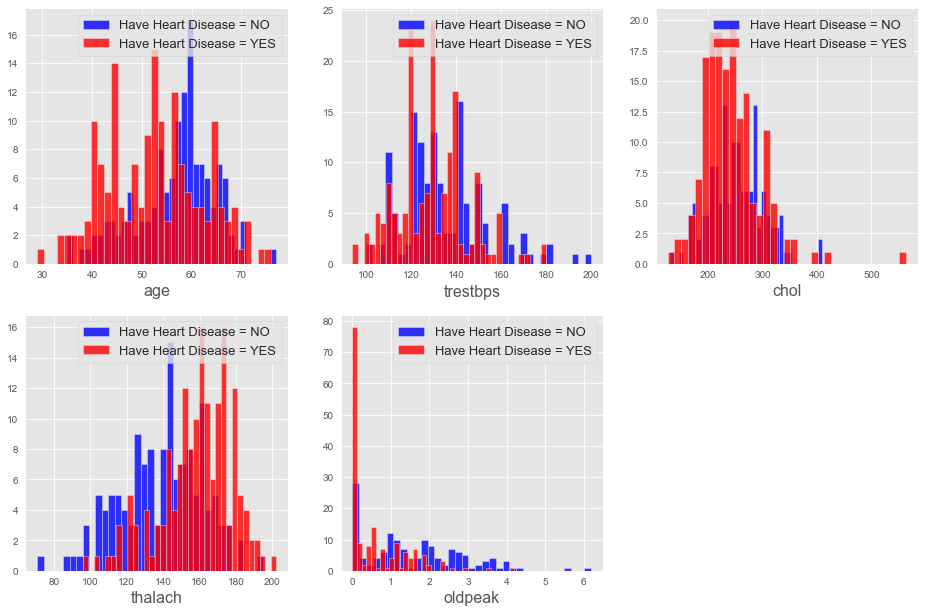

In [18]:
plt.figure(figsize=(16,16))
for i,j in enumerate(con_var):
    plt.subplot(3,3,i+1)
    df[df["target"] == 0][j].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.8)
    df[df["target"] == 1][j].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.8)
    plt.xlabel(j,fontsize=16)
    plt.legend(fontsize=13)

## Observation
#### age 
patient age ranging between 40 to 60 are prone to heart disease

#### trestbps(resting blood pressure in millimeters of mercury (mm Hg) when the patient was admitted to the hospital)
danger is more between 130mm hg to 140mm Hg

#### chol(cholestrol)
above 200 is at higher risk

#### thalach(max heart rate during the stress test)
patient with max 140 are at higher risk


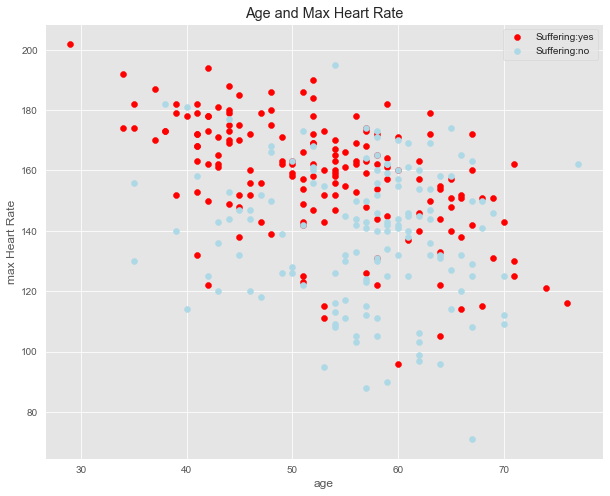

In [19]:
plt.figure(figsize=(10, 8))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="red")

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")
plt.title("Age and Max Heart Rate")
plt.xlabel("age")
plt.ylabel("max Heart Rate")
plt.legend(["Suffering:yes", "Suffering:no"]);

## Observation
we can see many young patient has higher max heart rate yet they are safe as compared to old people

## Data Processing

In [20]:
dataset = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], drop_first=True)

In [21]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


In [22]:
print(dataset.shape)

(303, 23)


In [23]:
sc = StandardScaler()
scale_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[scale_var] = sc.fit_transform(dataset[scale_var])

In [24]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


In [25]:
X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
allAlgo = [('lr', LogisticRegression()),('knn', KNeighborsClassifier()),('dclf', DecisionTreeClassifier()),
          ('svm', SVC()),('nb', GaussianNB())]

In [27]:
res = []
names = []
for name, algo in allAlgo:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(algo, X_train, y_train, cv=kfold, scoring='accuracy')
    res.append(cv_results)
    names.append(name)
    print(name, cv_results.mean(), cv_results.std())

lr 0.824891774891775 0.07472048323999347
knn 0.7735930735930736 0.08451653415540623
dclf 0.7261904761904762 0.08774780719317228
svm 0.7915584415584415 0.10349874409949063
nb 0.806060606060606 0.11601085463689734


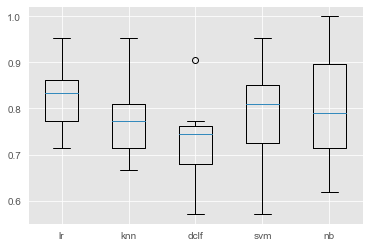

In [28]:
fig = plt.figure()
plt.boxplot(res)
tick=range(1,len(names)+1)
plt.xticks(ticks=tick,labels=names)
plt.show()


###### We can identify that Logistic and SVM is giving quite good accuracy.

##### For our easiness we make a function that calculate everything with train and test

In [29]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## Logistic Regression

In [30]:
lr = LogisticRegression(solver='saga',penalty='elasticnet',l1_ratio=0.6,max_iter=1000)
lr.fit(X_train, y_train)

print_score(lr, X_train, y_train, X_test, y_test, train=True)
print_score(lr, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.870968    0.865546  0.867925    0.868257      0.868027
recall      0.835052    0.895652  0.867925    0.865352      0.867925
f1-score    0.852632    0.880342  0.867925    0.866487      0.867663
support    97.000000  115.000000  0.867925  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 81  16]
 [ 12 103]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.871795   0.865385  0.868132   0.868590      0.868273
recall      0.829268   0.900000  0.868132   0.864634      0.868132
f1-score    0.850000   0.882353  0.868132   0.866176      0.867776
support    41.000000  50.000000  0.868132  91.000000     91.000000
_____________

## Applying PCA on Logistic Regression

In [31]:
pca = PCA(n_components=10) 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
expained_variance = pca.explained_variance_ratio_
classifier = LogisticRegression(random_state = 1)
classifier.fit(X_train_pca, y_train)
print_score(classifier, X_train_pca, y_train, X_test_pca, y_test, train=True)
print_score(classifier, X_train_pca, y_train, X_test_pca, y_test, train=False)

Train Result:
Accuracy Score: 83.49%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.822917    0.844828  0.834906    0.833872      0.834802
recall      0.814433    0.852174  0.834906    0.833303      0.834906
f1-score    0.818653    0.848485  0.834906    0.833569      0.834835
support    97.000000  115.000000  0.834906  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[79 18]
 [17 98]]

Test Result:
Accuracy Score: 82.42%
_______________________________________________
CLASSIFICATION REPORT:
                   0      1  accuracy  macro avg  weighted avg
precision   0.804878   0.84  0.824176   0.822439      0.824176
recall      0.804878   0.84  0.824176   0.822439      0.824176
f1-score    0.804878   0.84  0.824176   0.822439      0.824176
support    41.000000  50.00  0.824176  91.000000     91.000000
_____________________________________

We can observe by applying pca we are not getting a good accuracy.

# Support Vector Machine

In [32]:
sv = SVC(kernel='rbf',C=1)
sv.fit(X_train, y_train)
print_score(sv, X_train, y_train, X_test, y_test, train=True)
print_score(sv, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.98%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.908163    0.929825  0.919811    0.918994      0.919913
recall      0.917526    0.921739  0.919811    0.919632      0.919811
f1-score    0.912821    0.925764  0.919811    0.919292      0.919842
support    97.000000  115.000000  0.919811  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 89   8]
 [  9 106]]

Test Result:
Accuracy Score: 87.91%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.840909   0.914894  0.879121   0.877901      0.881560
recall      0.902439   0.860000  0.879121   0.881220      0.879121
f1-score    0.870588   0.886598  0.879121   0.878593      0.879385
support    41.000000  50.000000  0.879121  91.000000     91.000000
_____________

## KNeighboursClassifier

In [33]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 83.49%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.822917    0.844828  0.834906    0.833872      0.834802
recall      0.814433    0.852174  0.834906    0.833303      0.834906
f1-score    0.818653    0.848485  0.834906    0.833569      0.834835
support    97.000000  115.000000  0.834906  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[79 18]
 [17 98]]

Test Result:
Accuracy Score: 80.22%
_______________________________________________
CLASSIFICATION REPORT:
                   0      1  accuracy  macro avg  weighted avg
precision   0.780488   0.82  0.802198   0.800244      0.802198
recall      0.780488   0.82  0.802198   0.800244      0.802198
f1-score    0.780488   0.82  0.802198   0.800244      0.802198
support    41.000000  50.00  0.802198  91.000000     91.000000
_____________________________________

## GaussianNB

In [34]:
gn = GaussianNB()
gn.fit(X_train, y_train)
print_score(gn, X_train, y_train, X_test, y_test, train=True)
print_score(gn, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.38%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.851064    0.855932  0.853774    0.853498      0.853705
recall      0.824742    0.878261  0.853774    0.851502      0.853774
f1-score    0.837696    0.866953  0.853774    0.852325      0.853567
support    97.000000  115.000000  0.853774  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 14 101]]

Test Result:
Accuracy Score: 80.22%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.755556   0.847826  0.802198   0.801691      0.806254
recall      0.829268   0.780000  0.802198   0.804634      0.802198
f1-score    0.790698   0.812500  0.802198   0.801599      0.802677
support    41.000000  50.000000  0.802198  91.000000     91.000000
_____________

## DecisionTreeClassifier

In [35]:
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)
print_score(dc, X_train, y_train, X_test, y_test, train=True)
print_score(dc, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
Accuracy Score: 71.43%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.674419   0.750000  0.714286   0.712209      0.715947
recall      0.707317   0.720000  0.714286   0.713659      0.714286
f1-score    0.690476   0.734694  0.714286   0.712585      0.714772
support    41.000000  50.000000  0.714286  91.000000     91.000000
_______________________________________________
Confusion Matrix: 


In [36]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)
print("Cross validation of LR model = ",cross_validation)
print("Cross validation of LR model (in mean) = ",cross_validation.mean())


Cross validation of LR model =  [0.86363636 0.86363636 0.80952381 0.85714286 0.71428571 0.76190476
 0.9047619  0.95238095 0.71428571 0.80952381]
Cross validation of LR model (in mean) =  0.825108225108225


In [37]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = sv, X = X_train, y = y_train, cv = 10)
print("Cross validation of SVC model = ",cross_validation)
print("Cross validation of SVC model (in mean) = ",cross_validation.mean())

Cross validation of SVC model =  [0.86363636 0.86363636 0.76190476 0.76190476 0.57142857 0.80952381
 0.85714286 0.9047619  0.71428571 0.80952381]
Cross validation of SVC model (in mean) =  0.7917748917748918


### Coclusion 
Kfold Crossvalidation is performed on Logistic Regression and Support Vector Machine
From that we have concluded that Logistic Regression has better accuracy.